In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part One - Extracting Data With Pandas

As we discussed last week, the 'Read HTML' function in Pandas is an easy way to pull down tables from web pages. We'll be using Wikipedia for a lot of examples in class.

Today we'll be looking at the Wikipedia page the median age of every country in the world.

If you need to know more about a function in Python, you can type in a function with a question mark next to it to pull up its documentation (you can also Google the function). The question mark below will pull up the same info you can see at https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [2]:
pd.read_html?

The Read HTML function only has one required argument, which is the URL of the page you want to scrape. It will return a **list of dataframes** from that page - essentially it will translate anything on a page that's structured as a table and return it as a **dataframe** to work with.

Below we'll see that there are two dataframes in this list as per the len function, which gives us the length of a variable.

In [3]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')
print(len(tables))

2


If we add a '0' in brackets after the function, we'll get the first dataframe in the list. (the head function after gives us the first five rows of the dataframe)

Note that Python uses **0-based indexing** meaning that if you want to access the first item in a list, you reference it with **0** rather than **1**.

In [4]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')[0].head()

,0,1,2,3,4
0,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
1,Afghanistan,208,18.8,18.8,18.9
2,Albania,95,32.9,31.6,34.3
3,Algeria,136,28.1,27.8,28.4
4,American Samoa,122,25.5,25.1,26.0


We can turn the first row into column headers by adding the 'header' argument with the number of the row we want to use as the header.

In [5]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0].head()

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
0,Afghanistan,208,18.8,18.8,18.9
1,Albania,95,32.9,31.6,34.3
2,Algeria,136,28.1,27.8,28.4
3,American Samoa,122,25.5,25.1,26.0
4,Andorra,10,44.3,44.4,44.1


Now we can turn this into a local dataframe and work with it!

In [6]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]

### Extreme Crash Course in Dataframes

In [7]:
#Get the dimensions of a DataFrame
df.shape

(230, 5)

In [8]:
#Get the columns in a DataFrame
df.columns

Index(['Country/Territory', 'Rank', 'Total(Year)', 'Male(Year)',
       'Female (Year)'],
      dtype='object')

In [9]:
#Get the datatype of each column in a Dataframe
df.dtypes

Country/Territory     object
Rank                   int64
Total(Year)          float64
Male(Year)           float64
Female (Year)        float64
dtype: object

In [10]:
#Extract a column in a Dataframe as a Series
df['Country/Territory'].head()

0       Afghanistan
1           Albania
2           Algeria
3    American Samoa
4           Andorra
Name: Country/Territory, dtype: object

In [11]:
#Extract multiple columns in a Dataframe as a new Dataframe
df[['Country/Territory', 'Rank']].head()

,Country/Territory,Rank
0,Afghanistan,208
1,Albania,95
2,Algeria,136
3,American Samoa,122
4,Andorra,10


## Part Two - Data Visualization

Now that we've seen our way around Pandas, we can look at some actual data using the techniques and metrics we saw in the lecture.

The 'Total(Year)' column in our dataframe is the median age for every country in the world. Let's see what the distribution is like and find out more about it.

First, let's plot a histogram to see the distribution using Seaborn and Matplotlib. Matplotlib is a core Python visualization library while Seaborn is a package built on top of it. You could go a mile deep into what these two packages are capable of, as you'll see in the readings this week. We want to keep it simple without it getting overwhelming for now. We'll learn the new tools as we need them.

(array([28., 27., 29., 33., 28., 24., 25., 32.,  3.,  1.]),
 array([15.4 , 19.17, 22.94, 26.71, 30.48, 34.25, 38.02, 41.79, 45.56,
        49.33, 53.1 ]),
 <a list of 10 Patch objects>)

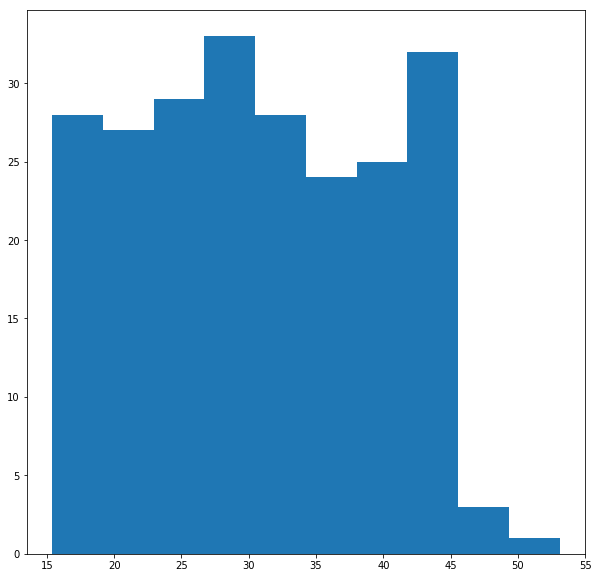

In [12]:
#Plot a Histogram - The Fig Line is to Make the Graph Bigger
fig = plt.figure(figsize=(10,10))
plt.hist(df['Total(Year)'])

Looks like the median ages of countries are pretty evenly dispersed between ages 15 and 45, with a few countries that might have a higher age.

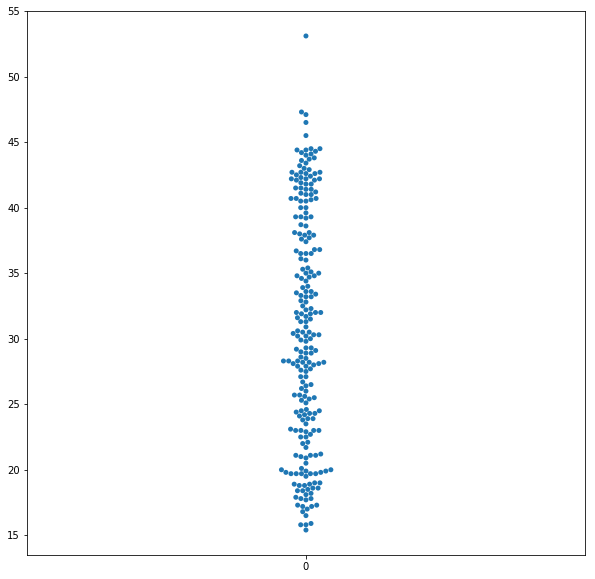

In [13]:
#Plot a Swarmplot
fig = plt.figure(figsize=(10,10))
sns.swarmplot(data=df['Total(Year)'])

The swarmplot shows us that there's a country with an age between 50 and 55 that really sticks out.

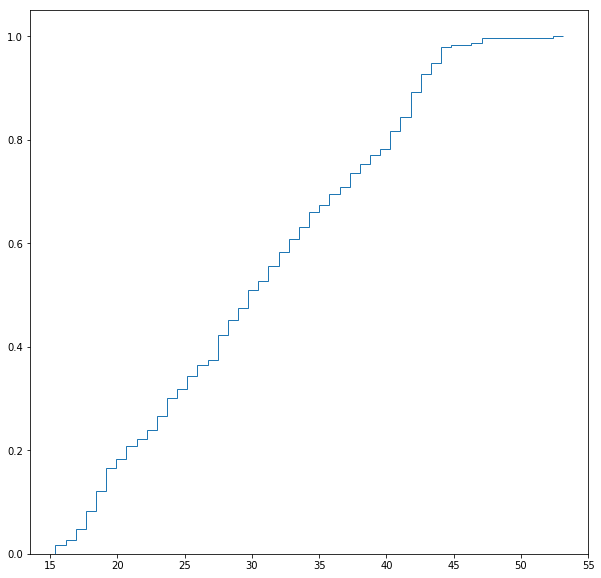

In [14]:
#Plot an ECDF
fig = plt.figure(figsize=(10,10))
n,bins,patches = plt.hist(df['Total(Year)'], cumulative=True, bins=50, density=True, histtype='step');
#This extra line removes the final line from the graph
patches[0].set_xy(patches[0].get_xy()[:-1])

 The ECDF also confirms that the distribution is relatively uniform up through age 45.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4826953828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4826953eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4826953400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f482695c588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f482695c8d0>],
 'means': []}

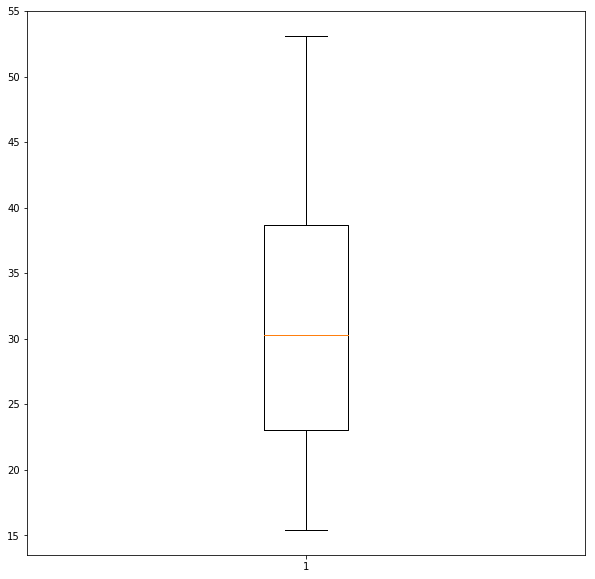

In [15]:
#Plot a Boxplot
fig = plt.figure(figsize=(10,10))
plt.boxplot(df['Total(Year)'])

The boxplot shows that the country with the median age of 55 isn't officially considered an outlier.

Hopefully you can see how using multiple visualizations can give you a more complete understanding of your distribution!

## Part Three - Summary Statistics

First, let's get the mean and median values of our dataset.

In [16]:
#Mean
np.mean(df['Total(Year)'])

30.738695652173924

In [17]:
#Median
np.median(df['Total(Year)'])

30.3

The mean and the median being close make sense, since the data is fairly evenly distributed (had the data been highly skewed, the mean and the median would be further apart).

Now let's look at the variance and standard deviation.

In [18]:
#Variance
np.var(df['Total(Year)'])

78.67019829867668

In [19]:
#Standard Deviation
np.std(df['Total(Year)'])

8.869622218486912

These numbers don't really provide much information by themselves.

In [20]:
np.sqrt(np.var(df['Total(Year)']))

8.869622218486912

Here we can see that the square root of the variance is indeed the standard deviation.

In [21]:
total_variance = 0
for i in df['Total(Year)']:
    x = np.power(i - df['Total(Year)'].mean(), 2)
    total_variance += x
print(total_variance/len(df['Total(Year)']))

78.67019829867668


For those curious, above is the variance executed by 'hand'

In [22]:
#Maximum
np.max(df['Total(Year)'])

53.1

In [23]:
#Minimum
np.min(df['Total(Year)'])

15.4

In [24]:
#Range
np.max(df['Total(Year)']) - np.min(df['Total(Year)'])

37.7

Above is the maximum, minimum, and range.

In [25]:
#First Quartile
np.percentile(df['Total(Year)'], q=25)

23.0

In [26]:
#Second Quartile
np.percentile(df['Total(Year)'], q=50)

30.3

In [27]:
#Third Quartile
np.percentile(df['Total(Year)'], q=75)

38.675000000000004

In [28]:
#Interquartile Range
np.percentile(df['Total(Year)'], q=75) - np.percentile(df['Total(Year)'], q=25)

15.675000000000004

Above are the first, second, and third quartiles. A few things here:

* Note that the value of the second quartile is equivalent to the median which we found earlier.
* Note that the difference between the first quartile and second quartile and the difference between the second quratile and third quartile are pretty close to each other, confirming that the data is pretty evenly distributed between these quartiles. The difference between the minimum value and the first quartile is also pretty close these values, however the diference between the third quartile and the maximum value is slightly larger than these, confirming our visual understanding that this distribution is fairly uniform besides a few high outliers.

Note that below it the unofficial equation for what constitutes a cutoff - anything above this value is technically an outlier.

In [29]:
np.percentile(df['Total(Year)'], q=75) + (np.percentile(df['Total(Year)'], q=75) - np.percentile(df['Total(Year)'], q=25)) * 1.5

62.187500000000014

And anything below this value is techincally an outlier. Obviously someone's age can't be negative, so this measure isn't perfect in this case.

In [30]:
np.percentile(df['Total(Year)'], q=25) - (np.percentile(df['Total(Year)'], q=75) - np.percentile(df['Total(Year)'], q=25)) * 1.5

-0.5125000000000064

## Part Four - Pandas Wrangling

Now we can do some brief Pandas wrangling to find out a few things. First we can see which country had the highest median age.

In [31]:
df[df['Total(Year)'] == np.max(df['Total(Year)'])]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
137,Monaco,1,53.1,51.7,54.5


As well as which country had the lowest.

In [32]:
df[df['Total(Year)'] == np.min(df['Total(Year)'])]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
151,Niger,230,15.4,15.3,15.5


We can also input different numbers by value - for example below we'll see which countries had a median age above 45. Try messing around with this!

In [33]:
df[df['Total(Year)'] >= 45]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
77,Germany,3,47.1,46.0,48.2
101,Italy,5,45.5,44.4,46.5
103,Japan,2,47.3,46.0,48.7
137,Monaco,1,53.1,51.7,54.5
174,Saint Pierre and Miquelon,4,46.5,46.0,47.0


## Part Five - Grouped Data

Now we'll import the associated continents for each country to look at this data by continent. We'll use the 'Read CSV' function, which reads in a CSV file.

In [34]:
continents = pd.read_csv('continents.csv')
continents.head()

,Country(or dependent territory),Continent
0,Nigeria,Africa
1,Ethiopia,Africa
2,Egypt,Africa
3,Democratic Republic of the Congo,Africa
4,South Africa,Africa


We can add this information using the merge function (this isn't vital to know right now).

In [35]:
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df.head()

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year),Country(or dependent territory),Continent
0,Afghanistan,208,18.8,18.8,18.9,Afghanistan,Asia
1,Albania,95,32.9,31.6,34.3,Albania,Europe
2,Algeria,136,28.1,27.8,28.4,Algeria,Africa
3,American Samoa,122,25.5,25.1,26.0,American Samoa,Oceania
4,Andorra,10,44.3,44.4,44.1,Andorra,Europe


This dataframe is a bit messy. Let's just keep the essential columns.

In [36]:
new_df = new_df[['Country/Territory', 'Total(Year)', 'Continent']]
new_df.head()

,Country/Territory,Total(Year),Continent
0,Afghanistan,18.8,Asia
1,Albania,32.9,Europe
2,Algeria,28.1,Africa
3,American Samoa,25.5,Oceania
4,Andorra,44.3,Europe


We can see how many countries are in each continent by using the 'value counts' function.

In [37]:
new_df['Continent'].value_counts()

Europe           55
Africa           50
Asia             49
North America    33
Oceania          21
South America    12
Name: Continent, dtype: int64

We can also use the "normalize" argument to see the percentage of total countries in each continent.

In [38]:
new_df['Continent'].value_counts(normalize=True)

Europe           0.250000
Africa           0.227273
Asia             0.222727
North America    0.150000
Oceania          0.095455
South America    0.054545
Name: Continent, dtype: float64

We can single out a single continent by using the code below.

In [39]:
new_df[new_df['Continent'] == 'Asia'].head()

,Country/Territory,Total(Year),Continent
0,Afghanistan,18.8,Asia
9,Armenia,35.1,Asia
13,Azerbaijan,31.3,Asia
15,Bahrain,32.3,Asia
16,Bangladesh,26.7,Asia


We can do a **groupby** function to get the average age, variance, and standard deviation for each continent.

In [40]:
new_df.groupby('Continent')['Total(Year)'].mean()

Continent
Africa           20.728000
Asia             30.077551
Europe           40.527273
North America    33.327273
Oceania          28.538095
South America    29.633333
Name: Total(Year), dtype: float64

In [41]:
new_df.groupby('Continent')['Total(Year)'].std()

Continent
Africa           4.739717
Asia             6.530705
Europe           4.352541
North America    6.492316
Oceania          5.376567
South America    3.191276
Name: Total(Year), dtype: float64

In [42]:
new_df.groupby('Continent')['Total(Year)'].var()

Continent
Africa           22.464914
Asia             42.650111
Europe           18.944613
North America    42.150170
Oceania          28.907476
South America    10.184242
Name: Total(Year), dtype: float64

This won't apply so much in this dataset, but you can group by multiple variables, too.

In [43]:
new_df.groupby(['Continent', 'Country/Territory'])['Total(Year)'].mean().head()

Continent  Country/Territory
Africa     Algeria              28.1
           Angola               15.9
           Benin                18.2
           Botswana             24.5
           Burkina Faso         17.3
Name: Total(Year), dtype: float64

Or you can see the value counts for a given continent.

In [44]:
new_df[new_df['Continent'] == 'Africa']['Country/Territory'].value_counts().head()

Kenya        1
Benin        1
Mauritius    1
Gabon        1
Lesotho      1
Name: Country/Territory, dtype: int64

We can lay the histograms for each of the continents on top of each other using a for loop.

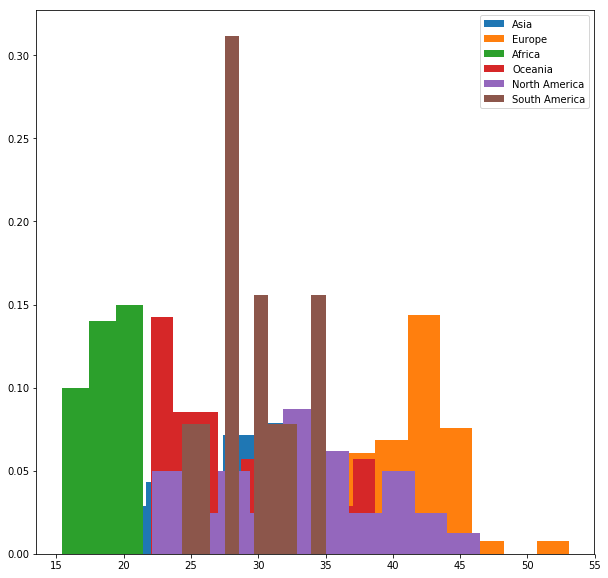

In [45]:
fig = plt.figure(figsize=(10,10))
for continent in new_df['Continent'].unique():
    plt.hist(new_df[new_df['Continent'] == continent]['Total(Year)'], density=True)
plt.gca().legend(new_df['Continent'].unique())

Unfortunately this looks extremely cluttered and isn't really helpful in our analysis. Histograms aren't great for this. Let's try a bee swarm, box plot and ECDF plot. Look below - what information can we gather from these?

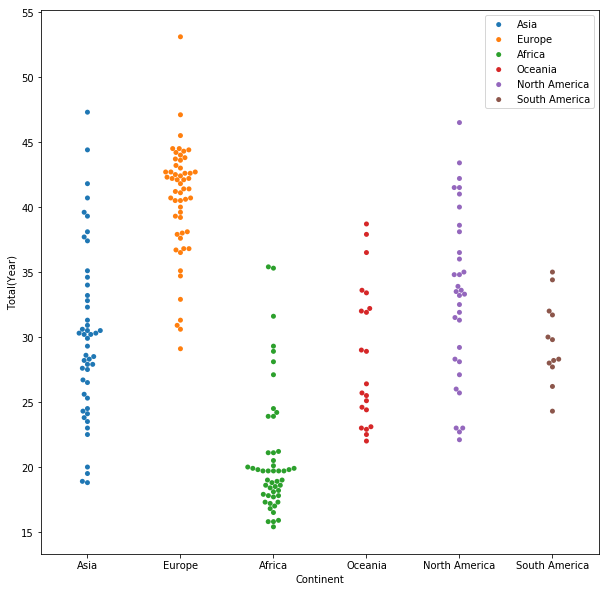

In [46]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='Total(Year)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

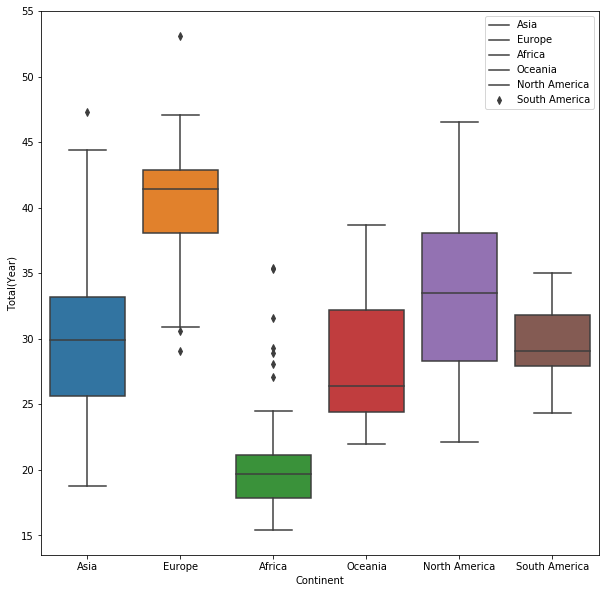

In [47]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Total(Year)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

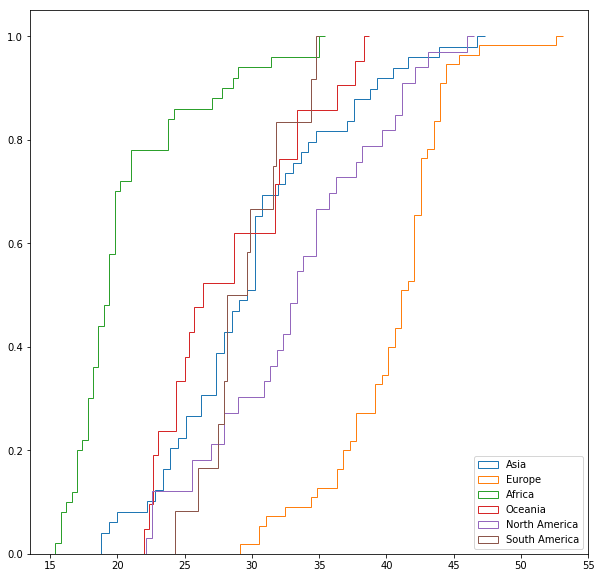

In [60]:
#Plot an ECDF
fig = plt.figure(figsize=(10,10))
for continent in new_df['Continent'].unique():
    n,bins,patches = plt.hist(new_df[new_df['Continent'] == continent]['Total(Year)'], cumulative=True, bins=50, density=True, histtype='step');
    patches[0].set_xy(patches[0].get_xy()[:-1])
plt.gca().legend(new_df['Continent'].unique(), loc='lower right')

## Part Six - Your Turn

Now it's your turn! The dataframe below has the logarithmic value of the GDP for every country in the world (we're taking the log because the regular GDP is essentially ungraphable - try it yourself and see what happens). Let's explore and see what we can find!

### l = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)', header=0)
world_gdp = l[1].iloc[3:194,1:3].reset_index(drop=True)
world_gdp.columns = ['Country', 'GDP']
world_gdp['Country'] = world_gdp['Country'].str.split('[').str[0]
world_gdp['GDP'] = world_gdp['GDP'].str.split('/').str[0].str.replace(',','')
world_gdp['GDP'] = world_gdp['GDP'].astype('float')
world_gdp['GDP_Log'] = np.log(world_gdp['GDP'])

#### 1. Plot the histogram, swarmplot, boxplot, and ECDF of the GDP Log. How does this histogram differ from the histogram we saw of the median age above? How does the ECDF differ from the ECDF we saw of the median age? What else can we tell about the distribution from these plots? Are there any outliers?

(array([ 1.,  7., 16., 22., 44., 40., 31., 18., 10.,  2.]),
 array([ 3.80666249,  5.10965318,  6.41264387,  7.71563456,  9.01862525,
        10.32161594, 11.62460663, 12.92759732, 14.23058801, 15.5335787 ,
        16.83656939]),
 <a list of 10 Patch objects>)

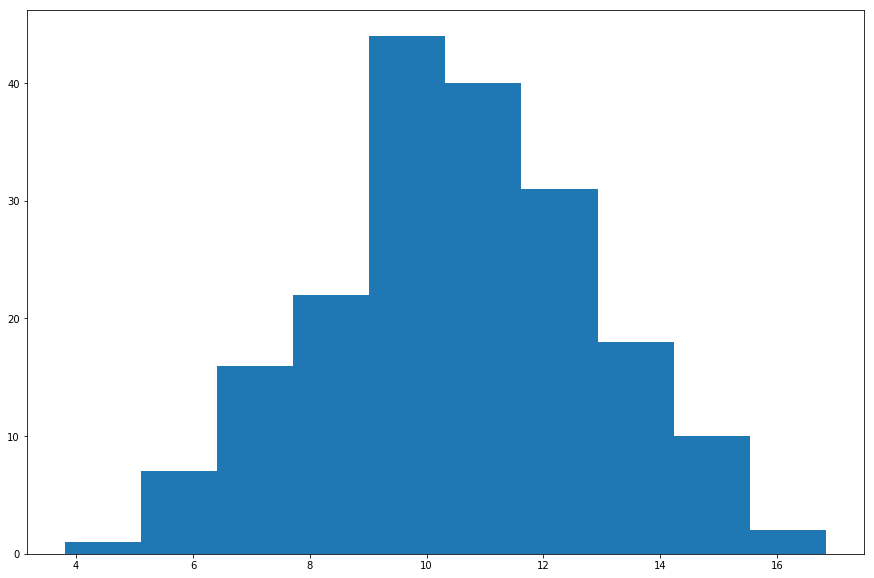

In [70]:
#Histogram
fig = plt.figure(figsize=(15,10))
plt.hist(world_gdp['GDP_Log'])

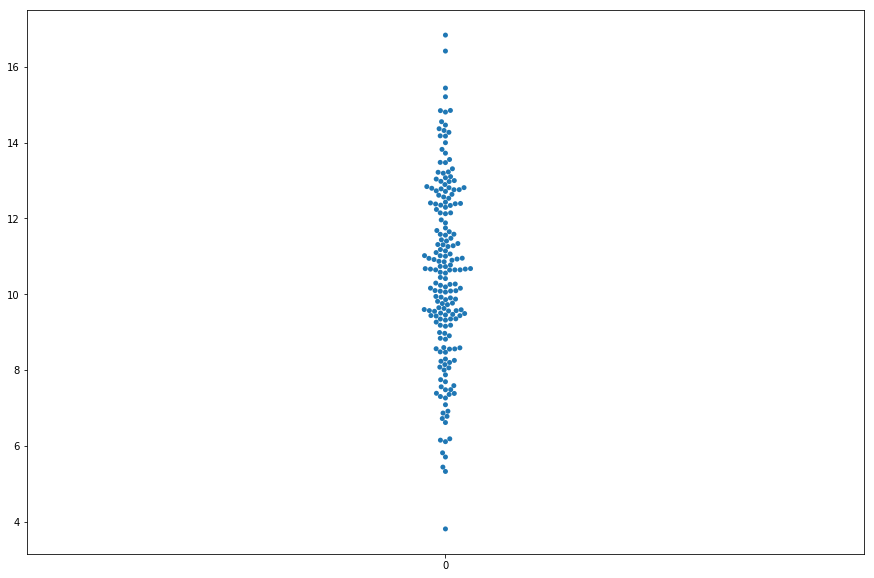

In [71]:
#Swarmplot
fig = plt.figure(figsize=(15,10))
sns.swarmplot(data=world_gdp['GDP_Log'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f481f1c2978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f481f1c2d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f481f1c2550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f481f1cc6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f481f1cca20>],
 'means': []}

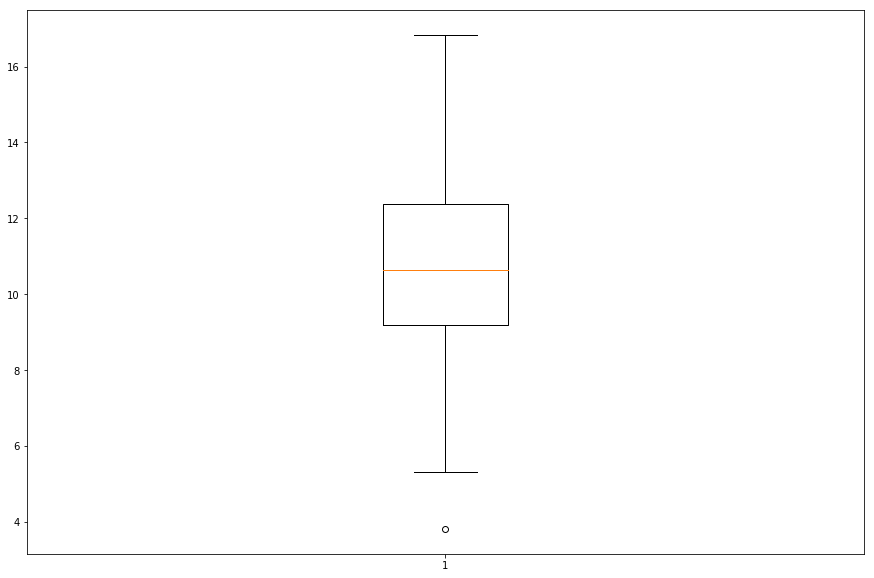

In [73]:
#boxplot
fig = plt.figure(figsize=(15,10))
plt.boxplot(world_gdp['GDP_Log'])

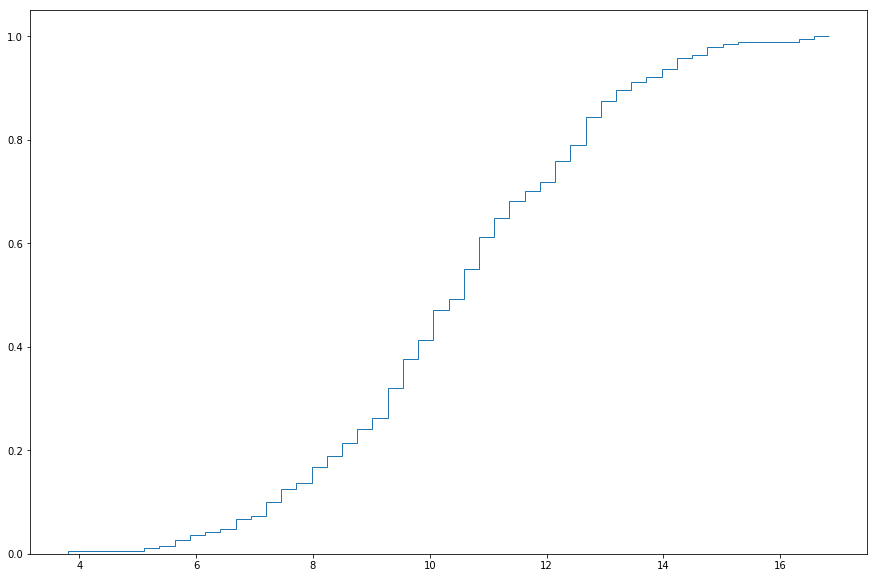

In [80]:
#ECDF
fig = plt.figure(figsize=(15,10))
n,bins,patches = plt.hist(world_gdp['GDP_Log'], cumulative=True, bins=50, density=True, histtype='step');
#This extra line removes the final line from the graph
patches[0].set_xy(patches[0].get_xy()[:-1])

### ANSWERS TO THE QUESTIONS

### i. How does this histogram differ from the histogram we saw of the median age above?

Answer: This histogram is more symmetrical, and distributions are more concentrated towards the center.

### ii. How does the ECDF differ from the ECDF we saw of the median age? 

Answer: This also shows that ECDF is somewhat unifrom uptil age of 14.

### iii. What else can we tell about the distribution from these plots? Are there any outliers?

Answer: The distributions are not so much spread. Most of the ages are around mean ages. From the box plot we can see that there is an outlier at age of 4.

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of the GDP Log.

In [82]:
#mean
np.mean(world_gdp['GDP_Log'])

10.566274390714232

In [83]:
#median
np.median(world_gdp['GDP_Log'])

10.64144078072663

In [84]:
#variance
np.var(world_gdp['GDP_Log'])

5.460071918544747

In [87]:
#standard deviation
np.sqrt(np.var(world_gdp['GDP_Log']))

2.336679678206824

In [89]:
#maximum
np.max(world_gdp['GDP_Log'])

16.836569389464273

In [90]:
#minimum
np.min(world_gdp['GDP_Log'])

3.8066624897703196

In [91]:
#range
np.max(world_gdp['GDP_Log']) - np.min(world_gdp['GDP_Log'])

13.029906899693954

In [94]:
#interquartile range
np.percentile(world_gdp['GDP_Log'], q=75) - np.percentile(world_gdp['GDP_Log'], q=25)

3.2017418206787145

#### 3. Which country has the highest GDP? Which country has the lowest? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [96]:
#Which country has the highest GDP?
world_gdp[world_gdp['GDP_Log'] == np.max(world_gdp['GDP_Log'])]

,Country,GDP,GDP_Log
0,United States,20513000.0,16.836569


According to this, United States had the highest GDP

In [99]:
#Which country has the lowest
world_gdp[world_gdp['GDP_Log'] == np.min(world_gdp['GDP_Log'])]

,Country,GDP,GDP_Log
190,Tuvalu,45.0,3.806662


According to this, Tuvalu has the lowest GDP

In [104]:
#Which countries are outliers? What constitutes the cutoff for an outlier in this case?

#Anything above this is an outlier
np.percentile(world_gdp['GDP_Log'], q=75) + (np.percentile(world_gdp['GDP_Log'], q=75) - np.percentile(world_gdp['GDP_Log'], q=25)) * 1.5

17.185574940301578

In [103]:
#Which countries are outliers? What constitutes the cutoff for an outlier in this case?

#Anything below this is an outlier
np.percentile(world_gdp['GDP_Log'], q=25) - (np.percentile(world_gdp['GDP_Log'], q=75) - np.percentile(world_gdp['GDP_Log'], q=25)) * 1.5

4.378607657586721

In [107]:
#Checking which countries are above 17.1855 - for outlier
world_gdp[world_gdp['GDP_Log'] >= 17.1855]



,Country,GDP,GDP_Log


Hence we see there is no outlier here

In [131]:
#Checking which countries are below 4.378 - for outlier
world_gdp[world_gdp['GDP_Log'] <= 4.378]

,Country,GDP,GDP_Log
190,Tuvalu,45.0,3.806662


Hence we see Tuvalu is an outlier here

#### 4. Now let's join the continents file in and see what we can find.

In [132]:
continents = pd.read_csv('https://github.com/CSC217/spring_2019/raw/master/week02-descriptive_stats/continents.csv')
world_gdp_new = world_gdp.merge(continents, how='inner', left_on='Country', right_on='Country(or dependent territory)')
world_gdp_new = world_gdp_new[['Country', 'GDP_Log', 'Continent']]
world_gdp_new.head()


,Country,GDP_Log,Continent
0,United States,16.836569,North America
1,China,16.415030,Asia
2,Japan,15.438975,Asia
3,Germany,15.209064,Europe
4,United Kingdom,14.848303,Europe


#### 5. Plot the swarmplot, boxplot, and ECDF of the gropued GDP Log. Which continent has the highest mean GDP? Which continent has the highest median GDP? Which continent had the highest difference between its median GDP and mean GDP? What do you think accounts for that difference? Which continent has the highest variance? Which continent has the highest range? Do any of the continents have outliers, and if so, which countries are outliers?

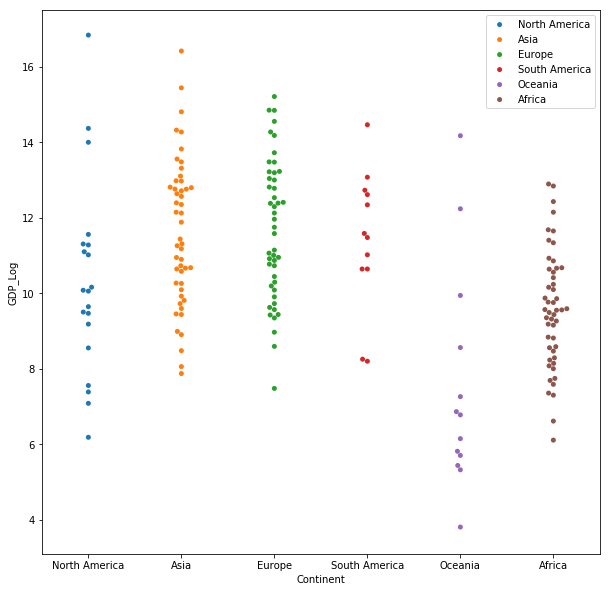

In [133]:
#Swarmplot
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='GDP_Log', data=world_gdp_new)
plt.gca().legend(world_gdp_new['Continent'].unique())

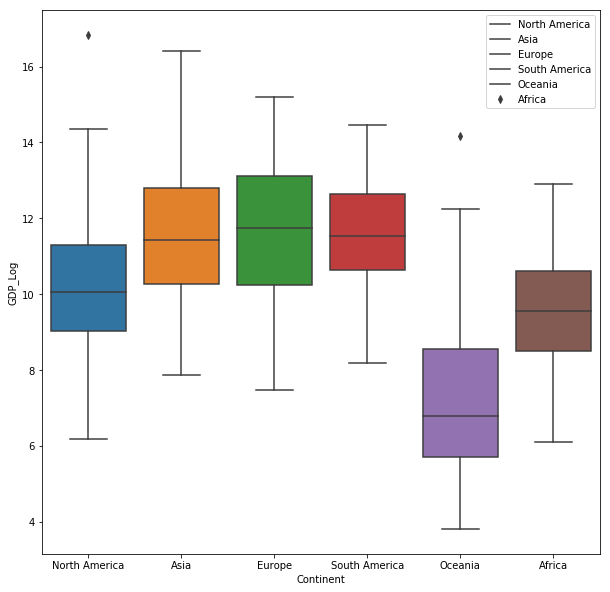

In [134]:
#boxplot
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='GDP_Log', data=world_gdp_new)
plt.gca().legend(world_gdp_new['Continent'].unique())

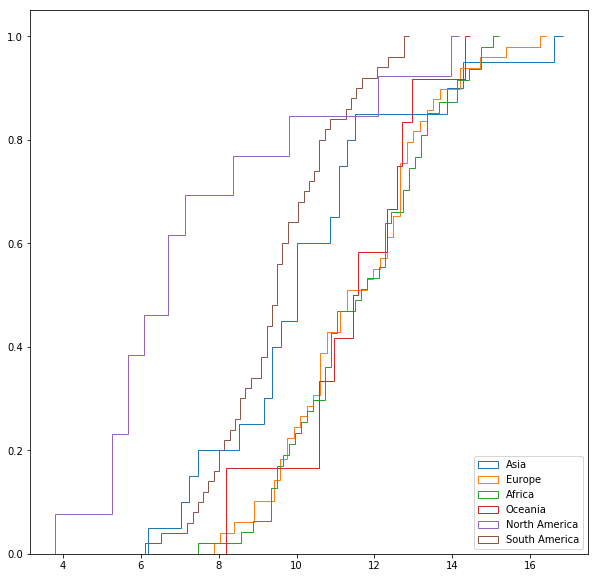

In [135]:
#ECDF
fig = plt.figure(figsize=(10,10))
for continent in world_gdp_new['Continent'].unique():
    n,bins,patches = plt.hist(world_gdp_new[world_gdp_new['Continent'] == continent]['GDP_Log'], cumulative=True, bins=50, density=True, histtype='step');
    patches[0].set_xy(patches[0].get_xy()[:-1])
plt.gca().legend(new_df['Continent'].unique(), loc='lower right')



## Answers to questions

### CELL BELOW EACH QUESTION SHOWS THE CODE

### i. Which continent has the highest median GDP?
Answer: Europe

In [142]:
world_gdp_new.groupby('Continent')['GDP_Log'].mean()

Continent
Africa            9.573513
Asia             11.623568
Europe           11.696649
North America    10.315005
Oceania           7.542000
South America    11.418801
Name: GDP_Log, dtype: float64

### ii. Which continent has the highest median GDP?
Answer: Europe

In [143]:
world_gdp_new.groupby('Continent')['GDP_Log'].median()

Continent
Africa            9.553248
Asia             11.435007
Europe           11.747128
North America    10.067216
Oceania           6.777647
South America    11.529291
Name: GDP_Log, dtype: float64

### iv. Which continent had the highest difference between its median GDP and mean GDP? v. What do you think accounts for that difference?  
Answer: Oceania because the values are not evenly distributed and skewed.

In [147]:
world_gdp_new.groupby('Continent')['GDP_Log'].mean() - world_gdp_new.groupby('Continent')['GDP_Log'].median()

Continent
Africa           0.020266
Asia             0.188561
Europe          -0.050479
North America    0.247789
Oceania          0.764353
South America   -0.110490
Name: GDP_Log, dtype: float64

### v. Which continent has the highest variance?
Answer: Oceania


In [148]:
world_gdp_new.groupby('Continent')['GDP_Log'].var()

Continent
Africa           2.417245
Asia             3.736542
Europe           3.456089
North America    6.691030
Oceania          8.792366
South America    3.433723
Name: GDP_Log, dtype: float64

### vi. Which continent has the highest range?
Answer: North America

In [152]:
world_gdp_new.groupby('Continent')['GDP_Log'].max() - world_gdp_new.groupby('Continent')['GDP_Log'].min()

Continent
Africa            6.783632
Asia              8.542575
Europe            7.730894
North America    10.652420
Oceania          10.364960
South America     6.263653
Name: GDP_Log, dtype: float64

### vii. Do any of the continents have outliers, and if so, which countries are outliers?
Answer: Oceania

The working is done below

In [165]:
# The outlier
np.percentile(world_gdp_new['GDP_Log'], q=75) + (np.percentile(world_gdp_new['GDP_Log'], q=75) - np.percentile(world_gdp_new['GDP_Log'], q=25)) * 1.5

16.980693468116883

In [166]:
# The outlier
np.percentile(world_gdp_new['GDP_Log'], q=25) - (np.percentile(world_gdp_new['GDP_Log'], q=75) - np.percentile(world_gdp_new['GDP_Log'], q=25)) * 1.5


4.767491681800438

In [167]:
#Check what countinents have GDP more than 16.980
world_gdp_new[world_gdp_new['GDP_Log'] >= 16.980]

,Country,GDP_Log,Continent


In [168]:
#Check what countinents have GDP less than 4.767
world_gdp_new[world_gdp_new['GDP_Log'] <= 4.767]

,Country,GDP_Log,Continent
190,Tuvalu,3.806662,Oceania


## Part Seven - Extra Data Wrangling

Some of these functions were beyond our crash course, but will be useful for this week's homework and beyond.

The 'describe' command can quickly pull out some relevant information that we looked at earlier.

In [51]:
df.describe()

,Rank,Total(Year),Male(Year),Female (Year)
count,230.000000,230.000000,230.000000,230.000000
mean,115.500000,30.738696,29.993913,31.451304
std,66.539462,8.888967,8.508904,9.337026
min,1.000000,15.400000,15.100000,15.500000
25%,58.250000,23.000000,22.725000,23.300000
50%,115.500000,30.300000,29.650000,30.650000
75%,172.750000,38.675000,37.100000,39.875000
max,230.000000,53.100000,51.700000,54.500000


We can filter our dataframe by looking at, for example, just countries where the male median age is higher than the female median age.

In [52]:
df[df['Male(Year)'] > df['Female (Year)']]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
4,Andorra,10,44.3,44.4,44.1
15,Bahrain,99,32.3,33.8,29.5
23,Bhutan,144,27.6,28.2,27.1
49,Cote d'Ivoire,187,20.9,21.0,20.9
81,Greenland,86,33.9,35.0,32.7
105,Jordan,178,22.5,22.9,22.0
112,Kuwait,124,29.3,30.4,27.4
119,Libya,130,28.9,29.1,28.7
123,Macau,56,39.3,39.5,39.1
144,Nauru,150,26.4,27.0,25.7


The homework mentions the quantile function - this is the same as the Numpy Percentile function. We'll see that pandas and numpy share a lot of similar functions.

In [53]:
df['Male(Year)'].quantile(0.25)

22.724999999999998

In [54]:
np.percentile(df['Male(Year)'], 25)

22.724999999999998

We can also run functions on entire series such as multiplication or division. We can even multiply, add, subtract or divide numerical columns by each other and form new columns with them.

In [55]:
(df['Female (Year)'] / 2).head()

0     9.45
1    17.15
2    14.20
3    13.00
4    22.05
Name: Female (Year), dtype: float64

In [56]:
df['Male_Female_Difference'] = df['Female (Year)'] - df['Male(Year)']

We can use numpy's 'power' function to square a series

In [57]:
(np.power(df['Female (Year)'], 2)).head()

0     357.21
1    1176.49
2     806.56
3     676.00
4    1944.81
Name: Female (Year), dtype: float64